In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-hack-product-sentiment-classification/Participants_Data/Test.csv
/kaggle/input/machine-hack-product-sentiment-classification/Participants_Data/Sample Submission.csv
/kaggle/input/machine-hack-product-sentiment-classification/Participants_Data/Train.csv


In [2]:
!pip install autoviml --upgrade

     |████████████████████████████████| 111 kB 577 kB/s eta 0:00:01
     |████████████████████████████████| 125 kB 1.8 MB/s eta 0:00:01


In [3]:
from autoviml.Auto_ViML import Auto_ViML

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk


Imported Auto_NLP version: 0.0.42.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
Imported Auto_ViML version: 0.1.662. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
To remove previous versions, perform 'pip uninstall autoviml'
NEW! Now Auto_ViML comes with a feature_engineering module using featuretools library!
To get the latest versio

In [4]:
train = pd.read_csv("/kaggle/input/machine-hack-product-sentiment-classification/Participants_Data/Train.csv")
test = pd.read_csv("/kaggle/input/machine-hack-product-sentiment-classification/Participants_Data/Test.csv")
samp = pd.read_csv("/kaggle/input/machine-hack-product-sentiment-classification/Participants_Data/Sample Submission.csv")

In [5]:
train.head()

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2


In [6]:
train.drop('Text_ID', axis=1, inplace=True)
test.drop('Text_ID', axis=1, inplace=True)

In [7]:
train = train.rename(columns={'Product_Description' : 'text', 'Sentiment': 'labels'})
test = test.rename(columns={'Product_Description' : 'text'})

In [8]:
target = 'labels'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (6364, 3)
    Training Set Memory Usage = 0.15 MB
Test Set Shape = (2728, 2)
    Test Set Memory Usage = 0.04 MB
Single_Label Target: ['labels']
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
Shuffling the data set before training
       Class  -> Counts -> Percent
           0:     111  ->    1.7%
           1:     399  ->    6.3%
           2:    3765  ->   59.2%
           3:    2089  ->   32.8%
Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
CAUTION: In Multi-Class Boosting (2+ classes), TRAINING WILL TAKE A LOT OF TIME!
    Target labels is already numeric. No transformation done.
Alert! Rare Class is not 1 but 0 in this data set
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    2 Predictors classified...
        This do

    Selected the maximum number of features limit = 19175
Performing RandomizedSearchCV across 30 params. Optimizing for accuracy
    Using train data = (5409,) and Cross Validation data = (955,)
Using a Calibrated Classifier in this Multi_Classification dataset to improve results...
Since top_num_features < 300, Multinomial NB model selected. If you need different model, increase it >= 300.
Training completed. Time taken for training = 0.4 minutes
Best Params of NLP pipeline are: {'multinomialnb__alpha': 0.41166323884293843, 'selectkbest__k': 10792, 'tfidfvectorizer__binary': True, 'tfidfvectorizer__encoding': 'utf-8', 'tfidfvectorizer__max_df': 0.08039991715696582}


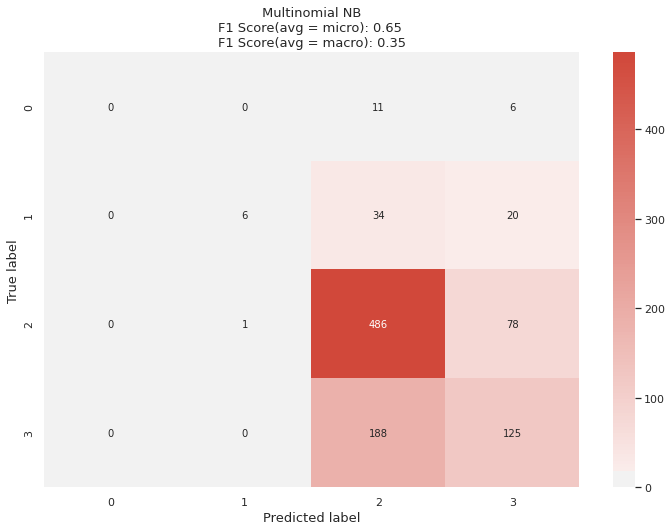

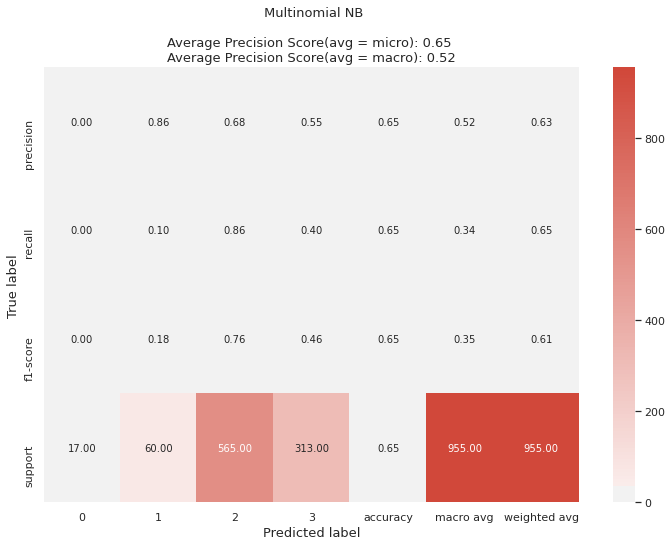

  Now transforming Train data to return as output...
  Transforming Test data to return as output...
##################    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  #####################
    Now we will start transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 10792 term-matrix to 100 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (6364, 100)
    Time Taken for Truncated SVD = 11 seconds
TruncatedSVD Data Frame size = (6364, 100)
Reducing dimensions from 10792 term-matrix to 100 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (2728, 100)
    Time Taken for Truncated SVD = 0 seconds
TruncatedSVD Data Frame size = (2728, 100)
Creating word clusters using term matrix of size: 6364 for Train data set...
    Running k-means on NLP token matrix to create 5 word clusters.
    Created one new column: text_word_cluster_label using KMeans_Clusters on NLP transformed columns...
    Runn

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.065777
0:	test: 0.8035248	best: 0.8035248 (0)	total: 133ms	remaining: 8m 53s


100:	test: 0.8721565	best: 0.8730665 (35)	total: 6.22s	remaining: 4m
200:	test: 0.8837865	best: 0.8843535 (197)	total: 13.5s	remaining: 4m 14s
300:	test: 0.8899334	best: 0.8911003 (281)	total: 19.7s	remaining: 4m 1s
400:	test: 0.8908475	best: 0.8917512 (377)	total: 25.6s	remaining: 3m 49s
500:	test: 0.8890568	best: 0.8917752 (448)	total: 31.9s	remaining: 3m 42s
600:	test: 0.8874474	best: 0.8917752 (448)	total: 37.7s	remaining: 3m 33s
Stopped by overfitting detector  (250 iterations wait)

bestTest = 0.891775231
bestIteration = 448

Shrink model to first 449 iterations.
    Actual training time (in seconds): 44
###########  S I N G L E  M O D E L   R E S U L T S #################
7-fold Cross Validation logloss = 0.8917752309528844
    CatBoost Best Parameters for Model: Iterations = 448, learning_rate = 0.07
Best Model selected and its parameters are:
    {'nan_mode': 'Min', 'eval_metric': 'AUC', 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=3:

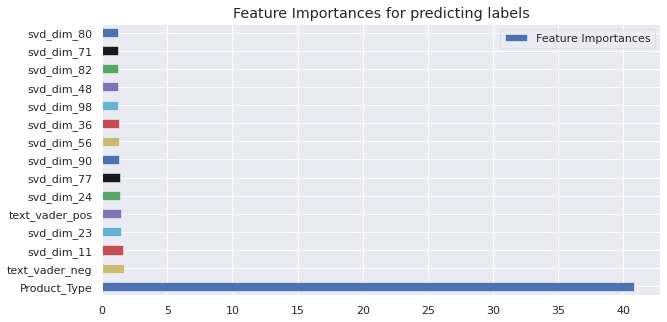

In [9]:
model, features, trainm, testm = Auto_ViML(
    train,
    target,
    test,
    samp,
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="neg_log_loss",
    KMeans_Featurizer=False,
    Boosting_Flag="CatBoost",
    Binning_Flag=False,
    Add_Poly=1,
    Stacking_Flag=True,
    Imbalanced_Flag=False,
    verbose=0
)

In [10]:
testm.head(3)

,Product_Type,text_vader_neg,text_vader_pos,svd_dim_22,svd_dim_48,svd_dim_24,svd_dim_11,svd_dim_71,svd_dim_9,svd_dim_68,...,text_hashtag_count,text_stop_word_count,Linear Discriminant_0,Linear Discriminant_1,labels_predictions,labels_proba_0,labels_proba_1,labels_proba_2,labels_proba_3,labels_Stacked_Linear Discriminant_predictions
0,7,0.05,0.24,-0.00,0.01,0.02,-0.00,0.02,0.01,-0.00,...,3,6,0.00,1.00,3,0.00,0.02,0.02,0.96,1
1,9,0.00,0.00,0.00,0.01,0.01,-0.00,-0.01,0.01,-0.02,...,1,4,0.01,0.99,2,0.01,0.01,0.94,0.05,1
2,9,0.00,0.19,-0.03,0.05,0.03,-0.00,0.03,0.04,-0.11,...,1,9,0.01,0.99,2,0.02,0.01,0.88,0.09,1


In [11]:
samp[['0','1','2','3']] = testm[['labels_proba_0','labels_proba_1','labels_proba_2','labels_proba_3']]

In [12]:
samp = samp.drop(['labels'],1)

In [13]:
samp.head()

,0,1,2,3
0,0.00,0.02,0.02,0.96
1,0.01,0.01,0.94,0.05
2,0.02,0.01,0.88,0.09
3,0.00,0.01,0.02,0.96
4,0.01,0.00,0.96,0.03


In [14]:
samp.shape

(2728, 4)

In [15]:
train = pd.read_csv("/kaggle/input/machine-hack-product-sentiment-classification/Participants_Data/Train.csv")
test = pd.read_csv("/kaggle/input/machine-hack-product-sentiment-classification/Participants_Data/Test.csv")

In [16]:
train.columns

Index(['Text_ID', 'Product_Description', 'Product_Type', 'Sentiment'], dtype='object')

In [17]:
test_ids = []
force_senti = []
for index,row in test.iterrows():
    temp = train[train['Product_Description'] == row['Product_Description']]
    temp = temp[temp['Product_Type'] == row['Product_Type']]
    if temp.shape[0] > 0:
        force_senti.append(list(set(temp['Sentiment'].tolist()))[0])
        test_ids.append(index)

In [18]:
dic = {0:[1,0,0,0],1:[0,1,0,0],2:[0,0,1,0],3:[0,0,0,1]}
for x,y in zip(test_ids,force_senti):
    #print(s1.iloc[x])
    target = dic[y]
    samp.iloc[x] = target
    #print(s1.iloc[x])

In [19]:
samp.head(3)

,0,1,2,3
0,0.00,0.02,0.02,0.96
1,0.01,0.01,0.94,0.05
2,0.02,0.01,0.88,0.09


In [22]:
samp.to_csv('Sub_v1.1.csv', index=False)